#1.-Lee un fichero EXA1.csv, muestra el tipo de datos y transforma las columnas object a categóricas. La target es la variable enfermedad


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import  KNeighborsRegressor

In [2]:
exa1='EXA1.csv'
df=pd.read_csv(exa1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            20 non-null     int64 
 1   EDAD          20 non-null     int64 
 2   SEXO          20 non-null     object
 3   FUMADOR       20 non-null     object
 4   POBLACION     20 non-null     object
 5   PROVINCIA     20 non-null     object
 6   NACIONALIDAD  20 non-null     object
 7   ESTUDIOS      20 non-null     object
 8   ENFERMEDAD    20 non-null     object
dtypes: int64(2), object(7)
memory usage: 1.5+ KB


In [4]:
df['SEXO']=pd.Categorical(df['SEXO'])
df['FUMADOR']=pd.Categorical(df['FUMADOR'])
df['POBLACION']=pd.Categorical(df['POBLACION'])
df['PROVINCIA ']=pd.Categorical(df['PROVINCIA '])
df['NACIONALIDAD']=pd.Categorical(df['NACIONALIDAD'])
df['ESTUDIOS']=pd.Categorical(df['ESTUDIOS'])
df['ENFERMEDAD']=pd.Categorical(df['ENFERMEDAD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            20 non-null     int64   
 1   EDAD          20 non-null     int64   
 2   SEXO          20 non-null     category
 3   FUMADOR       20 non-null     category
 4   POBLACION     20 non-null     category
 5   PROVINCIA     20 non-null     category
 6   NACIONALIDAD  20 non-null     category
 7   ESTUDIOS      20 non-null     category
 8   ENFERMEDAD    20 non-null     category
dtypes: category(7), int64(2)
memory usage: 1.7 KB


In [5]:
df

,ID,EDAD,SEXO,FUMADOR,POBLACION,PROVINCIA,NACIONALIDAD,ESTUDIOS,ENFERMEDAD
0,1,29,HOMBRE,SI,VALDESALOR,CACERES,ESPAÑOLA,DIPLOMADO,SI
1,2,18,HOMBRE,NO,PLASENICA,CACERES,FRANCESA,GRADO,NO
2,3,23,MUJER,SI,CORIA,CACERES,VENEZOLANA,MASTER,NO
3,4,37,MUJER,NO,CACERES,CACERES,ARGENTINA,DIPLOMADO,NO
4,5,45,MUJER,NO,MONTIJO,BADAJOZ,ESPAÑOLA,GRADO,NO
5,6,31,MUJER,SI,MERIDA,BADAJOZ,ARGENTINA,MASTER,SI
6,7,28,HOMBRE,NO,CORIA,CACERES,VENEZOLANA,DIPLOMADO,SI
7,8,19,HOMBRE,SI,CORIA,CACERES,ESPAÑOLA,GRADO,NO
8,9,28,HOMBRE,NO,PLASENICA,CACERES,ARGENTINA,GRADO,SI
9,10,20,MUJER,NO,VALDESALOR,CACERES,VENEZOLANA,DIPLOMADO,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            20 non-null     int64   
 1   EDAD          20 non-null     int64   
 2   SEXO          20 non-null     category
 3   FUMADOR       20 non-null     category
 4   POBLACION     20 non-null     category
 5   PROVINCIA     20 non-null     category
 6   NACIONALIDAD  20 non-null     category
 7   ESTUDIOS      20 non-null     category
 8   ENFERMEDAD    20 non-null     category
dtypes: category(7), int64(2)
memory usage: 1.7 KB


#2.-Transforma dos columnas categóricas a numéricas mediante dummies

In [7]:
#pasar sexo a dummies
sexo_dummy= pd.get_dummies(df['SEXO'], prefix="SEXO")
df= pd.concat([df,sexo_dummy], axis=1)
df= df.drop(['SEXO'], axis=1)

#pasar fumador a dummies
fumador_dummy= pd.get_dummies(df['FUMADOR'], prefix="FUMADOR")
df= pd.concat([df,fumador_dummy], axis=1)
df= df.drop(['FUMADOR'], axis=1)

In [8]:
df

,ID,EDAD,POBLACION,PROVINCIA,NACIONALIDAD,ESTUDIOS,ENFERMEDAD,SEXO_HOMBRE,SEXO_MUJER,FUMADOR_NO,FUMADOR_SI
0,1,29,VALDESALOR,CACERES,ESPAÑOLA,DIPLOMADO,SI,1,0,0,1
1,2,18,PLASENICA,CACERES,FRANCESA,GRADO,NO,1,0,1,0
2,3,23,CORIA,CACERES,VENEZOLANA,MASTER,NO,0,1,0,1
3,4,37,CACERES,CACERES,ARGENTINA,DIPLOMADO,NO,0,1,1,0
4,5,45,MONTIJO,BADAJOZ,ESPAÑOLA,GRADO,NO,0,1,1,0
5,6,31,MERIDA,BADAJOZ,ARGENTINA,MASTER,SI,0,1,0,1
6,7,28,CORIA,CACERES,VENEZOLANA,DIPLOMADO,SI,1,0,1,0
7,8,19,CORIA,CACERES,ESPAÑOLA,GRADO,NO,1,0,0,1
8,9,28,PLASENICA,CACERES,ARGENTINA,GRADO,SI,1,0,1,0
9,10,20,VALDESALOR,CACERES,VENEZOLANA,DIPLOMADO,NO,0,1,1,0


#3.-Transforma dos columnas categóricas a numéricas mediante cat codes

In [9]:
df['POBLACION']=df['POBLACION'].cat.codes
df['PROVINCIA ']=df['PROVINCIA '].cat.codes

In [10]:
df

,ID,EDAD,POBLACION,PROVINCIA,NACIONALIDAD,ESTUDIOS,ENFERMEDAD,SEXO_HOMBRE,SEXO_MUJER,FUMADOR_NO,FUMADOR_SI
0,1,29,7,1,ESPAÑOLA,DIPLOMADO,SI,1,0,0,1
1,2,18,5,1,FRANCESA,GRADO,NO,1,0,1,0
2,3,23,2,1,VENEZOLANA,MASTER,NO,0,1,0,1
3,4,37,1,1,ARGENTINA,DIPLOMADO,NO,0,1,1,0
4,5,45,4,0,ESPAÑOLA,GRADO,NO,0,1,1,0
5,6,31,3,0,ARGENTINA,MASTER,SI,0,1,0,1
6,7,28,2,1,VENEZOLANA,DIPLOMADO,SI,1,0,1,0
7,8,19,2,1,ESPAÑOLA,GRADO,NO,1,0,0,1
8,9,28,5,1,ARGENTINA,GRADO,SI,1,0,1,0
9,10,20,7,1,VENEZOLANA,DIPLOMADO,NO,0,1,1,0


#4.-Transforma dos columnas categóricas a numéricas mediante Labelencoder

In [11]:
labelencoder = LabelEncoder()
df['NACIONALIDAD']= labelencoder.fit_transform(df['NACIONALIDAD'])
df['ESTUDIOS']= labelencoder.fit_transform(df['ESTUDIOS'])

In [12]:
df

,ID,EDAD,POBLACION,PROVINCIA,NACIONALIDAD,ESTUDIOS,ENFERMEDAD,SEXO_HOMBRE,SEXO_MUJER,FUMADOR_NO,FUMADOR_SI
0,1,29,7,1,1,0,SI,1,0,0,1
1,2,18,5,1,2,1,NO,1,0,1,0
2,3,23,2,1,3,2,NO,0,1,0,1
3,4,37,1,1,0,0,NO,0,1,1,0
4,5,45,4,0,1,1,NO,0,1,1,0
5,6,31,3,0,0,2,SI,0,1,0,1
6,7,28,2,1,3,0,SI,1,0,1,0
7,8,19,2,1,1,1,NO,1,0,0,1
8,9,28,5,1,0,1,SI,1,0,1,0
9,10,20,7,1,3,0,NO,0,1,1,0


In [13]:
df['PROVINCIA ']=pd.Categorical(df['PROVINCIA '])
df['ENFERMEDAD']= labelencoder.fit_transform(df['ENFERMEDAD'])

In [14]:
#Separar las columnas de la target
X=df.drop(['ENFERMEDAD'],axis=1)
Y=df['ENFERMEDAD']

#5.-Dibuja el histograma de cada columna

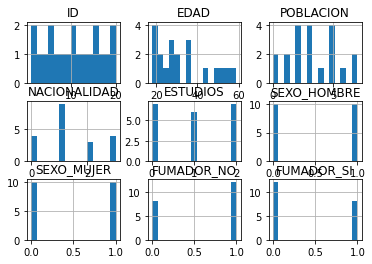

In [15]:
hist=X.hist(bins=15)

#6.-Aplica el test de Shapiro

In [16]:

for columna_numerica  in X.columns:
    stat, p = shapiro(X[columna_numerica])
    
    print('Valor de test=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('La variable ',columna_numerica, ' proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print('La variable ',columna_numerica, ' NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.960, p-value=0.551
La variable  ID  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.896, p-value=0.035
La variable  EDAD  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.946, p-value=0.312
La variable  POBLACION  proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.626, p-value=0.000
La variable  PROVINCIA   NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.851, p-value=0.005
La variable  NACIONALIDAD  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.790, p-value=0.001
La variable  ESTUDIOS  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.641, p-value=0.000
La variable  SEXO_HOMBRE  NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 

Valor de test=0.641, p-value=0.000
La variable  SEXO_MUJER  NO proviene de una distribución normal (rechazamos

#7.-Normaliza los datos numéricos

In [17]:
scaler=StandardScaler()
X1=scaler.fit_transform(X)

#8.-Divídelos en train (70%) y test(30%)

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.3,random_state=0)

#9.-Aplica el modelo de Regresión Lineal con validación cruzada y realiza una predicción

Cargar el modelo de regresión lineal con el train

In [19]:
modelo_lineal=linear_model.LinearRegression()

In [20]:
grid= GridSearchCV(estimator=modelo_lineal,param_grid={"n_jobs":[-1,0,1,2]},cv=2,error_score='raise')

In [21]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=2, error_score='raise', estimator=LinearRegression(),
             param_grid={'n_jobs': [-1, 0, 1, 2]})

Probar con el test (30%)

In [22]:
Y_test_pred=grid.predict(X_test)
Y_test_pred

array([2.07289186, 0.48308572, 1.19515849, 0.95645304, 0.05931401,
       1.90952347])


Realizar prediccion

In [23]:
x_pred=np.linspace(0,7,10).reshape(1,10)
Y1=grid.predict(x_pred)
Y1

array([2.27838056])

#10.-Aplica el modelo de Regresión KNN Vecinos con validación cruzada y realiza una predicción

Cargar el modelo de regresión knn vecinos con el train

In [24]:
knn_vecinos=KNeighborsRegressor()
params={'n_neighbors': range(1,20)}

In [25]:
grid2=GridSearchCV(knn_vecinos,params,cv=3)

In [26]:
grid2.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 729, in kneighbors
    " but n_samples = %d, n_neighbors = %d" % (n_samples_fit, n_neighbors)
ValueError: Expec

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

Hacer una predicción

In [27]:
array_prediccion=np.array([4,1.3434,0.6566,0.657,1,2,1,2,5,0.00455])
Y11=grid2.predict(array_prediccion.reshape(1,10))

In [28]:
Y11

array([0.57142857])